# Proyek Submission GDG Analisis Data : Used Car Dataset
- **Nama:** Muthia Nashiroh Ramadhani
- **Email:** muthianashiroh@gmail.com
- **Dashboard Link** : https://mlsubmission-vfl7db5bmka4bkig6vw9aa.streamlit.app/

## Menentukan Pertanyaan Bisnis
1. Berapa jumlah varian model untuk merek Toyota dan bagaimana hubungannya dengan harga yang ditawarkan?
2. Merek mobil mana yang memiliki harga rata-rata tertinggi?
3. Bagaimana distribusi jenis bahan bakar yang digunakan?
4. Apakah mobil dengan transmisi otomatis lebih mahal dibandingkan transmisi manual?
5. Tahun berapa mobil paling banyak dan paling sedikit diproduksi?
6. Berapa rata-rata usia mobil dan apakah mempengaruhi harganya?

## Import semua packages/ library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import zipfile

## Dataset setting

In [ ]:
!gdown --id 14VyxnYpE1zWjTHr8rZ-w2cKJZTOM1KJi

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14VyxnYpE1zWjTHr8rZ-w2cKJZTOM1KJi
To: /content/dataset_car.zip
100% 236k/236k [00:00<00:00, 70.8MB/s]


In [ ]:
# mengakses zip file
zip_file_path = '/content/dataset_car.zip'

# mengekstrak file zip ke folder baru
extract_folder = '/content/used_car_dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("File berhasil diekstrak")

File berhasil diekstrak


## Data Wrangling

### **Gathering Data**

Memuat data used_car menjadi sebuah Data Frame

In [ ]:
# mengakses dataset used_car
used_car_df = pd.read_csv ('/content/used_car_dataset/used_car_dataset.csv')
used_car_df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


### **Assessing Data**

- Mengecek tipe data dan kolom

In [ ]:
# mengecek tipe data dan kolom
used_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


- Mengecek missing value

In [ ]:
# mengecek missing value
used_car_df.isna().sum()

,0
Brand,0
model,0
Year,0
Age,0
kmDriven,47
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


- Mengecek duplikasi data
- Menampilkan statistik parameter

In [ ]:
# mengecek duplikasi data
print("Jumlah duplikasi: ", used_car_df.duplicated().sum())

# mengecek statistik parameter
used_car_df.describe()

Jumlah duplikasi:  724


,Year,Age
count,9582.000000,9582.000000
mean,2016.361094,7.638906
std,4.087226,4.087226
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


**Insight:**
1. Ada beberapa tipe data yang salah :
- kmDriven : object -> int
- PostedDate : object -> datetime
- AskPrice : object -> int
2. Terdapat missing value berjumlah 47 pada kolom KMDriven
3. Terdapat duplikasi data = 724
4. Tidak ada anomali dalam statistik parameter

### **Cleaning Data**

- Menangani missing value

In [ ]:
# mengecek missing value pada kolom kmDriven
used_car_df[used_car_df.kmDriven.isna()]

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
231,Maruti Suzuki,Alto-800,2019,5,NaN,Manual,first,Petrol,Nov-24,Maruti Suzuki Alto 800,"₹ 3,00,000"
353,Toyota,Innova,2016,8,NaN,Manual,second,Diesel,Nov-24,Toyota Innova 2016 model Diesel,"₹ 8,60,000"
444,Honda,City ZX,2024,0,NaN,Automatic,first,Petrol,Nov-24,Honda City,"₹ 15,50,000"
476,Hyundai,Santro Xing,2010,14,NaN,Automatic,second,Petrol,Nov-24,Hyundai Santro Xing 2010,"₹ 1,20,000"
608,Toyota,Etios,2012,12,NaN,Manual,second,Diesel,Nov-24,Toyota Etios Diesel Good Condition,"₹ 3,30,000"
793,Skoda,Kushaq,2010,14,NaN,Automatic,first,Petrol,Nov-24,"Car will have perfect condition,negotiation ar...","₹ 4,00,000"
976,Mahindra,Bolero Neo Plus,2015,9,NaN,Automatic,first,Diesel,Nov-24,Mahindra Bolero Neo Plus 2015,"₹ 4,50,000"
1164,Mahindra,Bolero Neo,2023,1,NaN,Manual,first,Diesel,Nov-24,Mahindra Bolero Neo 2023 Diesel,"₹ 10,00,000"
1199,Tata,Indica,2014,10,NaN,Manual,first,Diesel,Nov-24,Good running,"₹ 2,50,000"
1413,Hyundai,Santro Xing,2007,17,NaN,Manual,second,Petrol,Nov-24,Hyundai Santro Xing 2007 Petrol Good Condition,"₹ 1,48,000"


In [ ]:
# mengecek persentase dari missing value untuk melihat metode yang akan digunakan
total_rows = len(used_car_df)
missing_percentage = (47 / total_rows) * 100
print(f"Persentase missing value: {missing_percentage:.2f}%")

Persentase missing value: 0.49%


In [ ]:
# menghapus missing value pada kolom kmDriven
used_car_df = used_car_df.dropna(subset=['kmDriven'])

used_car_df.isnull().sum()

,0
Brand,0
model,0
Year,0
Age,0
kmDriven,0
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


- Mengganti tipe data yang salah

In [ ]:
# mengganti tipe data kmDriven dari object ke int
used_car_df['kmDriven'] = used_car_df['kmDriven'].str.replace(' km', '').str.replace(',', '').str.replace(".0","").str.strip().astype(int)

<ipython-input-11-5d70b83c7e77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_car_df['kmDriven'] = used_car_df['kmDriven'].str.replace(' km', '').str.replace(',', '').str.replace(".0","").str.strip().astype(int)


In [ ]:
# mengganti tipe data PostedDate dari object ke datetime

month_mapping = {
    'Nov-24': "11-11-2024",
    'Oct-24': "11-10-2024",
    'Sep-24': "11-09-2024",
    'Aug-24': "11-08-2024",
    'Jul-24': "11-07-2024",
    'Jun-24': "11-06-2024",
    'May-24': "11-05-2024",
    'Apr-24': "11-04-2024",
    'Mar-24': "11-03-2024",
    'Dec-23': "11-12-2023",
    'Jan-24': "11-01-2024",
    'Feb-24': "11-02-2024",
}

# Replace using .replace() with mapping
used_car_df['PostedDate'] = used_car_df['PostedDate'].replace(month_mapping)

# Convert to datetime
used_car_df['PostedDate'] = pd.to_datetime(used_car_df['PostedDate'])

In [ ]:
# mengganti tipe data AskPrice dari object ke int
used_car_df['AskPrice'] = used_car_df['AskPrice'].str.replace(',', '').str.replace('₹', '').str.strip().astype(int)

In [ ]:
# melihat tipe data yang sudah diganti
used_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Brand         9535 non-null   object        
 1   model         9535 non-null   object        
 2   Year          9535 non-null   int64         
 3   Age           9535 non-null   int64         
 4   kmDriven      9535 non-null   int64         
 5   Transmission  9535 non-null   object        
 6   Owner         9535 non-null   object        
 7   FuelType      9535 non-null   object        
 8   PostedDate    9535 non-null   datetime64[ns]
 9   AdditionInfo  9535 non-null   object        
 10  AskPrice      9535 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 893.9+ KB


- Menghapus duplikasi data

In [ ]:
# menghapus duplikasi data
used_car_df.drop_duplicates(inplace=True)

print("Jumlah duplikasi: ", used_car_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

In [ ]:
used_car_df.describe(include="all")

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
count,8805,8805,8805.000000,8805.000000,8805.000000,8805,8805,8805,8805,8805,8.805000e+03
unique,38,398,NaN,NaN,NaN,2,2,3,NaN,7270,NaN
top,Maruti Suzuki,City,NaN,NaN,NaN,Manual,first,Diesel,NaN,Good condition,NaN
freq,2569,305,NaN,NaN,NaN,4636,4575,3505,NaN,14,NaN
mean,NaN,NaN,2016.393413,7.606587,71010.514935,NaN,NaN,NaN,2024-11-10 17:24:13.492334080,NaN,1.042270e+06
min,NaN,NaN,1986.000000,0.000000,0.000000,NaN,NaN,NaN,2023-11-12 00:00:00,NaN,1.500000e+04
25%,NaN,NaN,2014.000000,5.000000,43000.000000,NaN,NaN,NaN,2024-11-11 00:00:00,NaN,3.550000e+05
50%,NaN,NaN,2017.000000,7.000000,65110.000000,NaN,NaN,NaN,2024-11-11 00:00:00,NaN,5.900000e+05
75%,NaN,NaN,2019.000000,10.000000,86000.000000,NaN,NaN,NaN,2024-11-11 00:00:00,NaN,1.075000e+06
max,NaN,NaN,2024.000000,38.000000,980002.000000,NaN,NaN,NaN,2024-11-11 00:00:00,NaN,4.250000e+07


In [ ]:
# Pertanyaan 1
# menampilkan jumlah model dari merek Toyota dan harga rata-rata mobil
brand_name = 'Toyota'
brand_data = used_car_df[used_car_df['Brand'] == brand_name]

# mengitung jumlah model dari merek Toyota
brand_model_counts = brand_data['model'].value_counts()

# mengitung harga rata-rata mobil dari merek Toyota
brand_model_avg_price = brand_data.groupby('model')['AskPrice'].mean()

# Menampilkan jumlah model dari merek Toyota
print("Jumlah model dari merek Toyota:")
print(brand_model_counts)

# Menampilkan harga rata-rata mobil dari merek Toyota
print("\nHarga rata-rata mobil dari merek Toyota:")
print(brand_model_avg_price)

Jumlah model dari merek Toyota:
model
Innova Crysta            170
Fortuner                 150
Innova                   113
Corolla Altis             74
Etios                     45
Camry                     33
Innova Hycross            25
Glanza                    20
Etios Liva                18
Urban Cruiser Hyryder     16
2.8 Legender 4X2          13
Corolla                   11
VELLFIRE                   7
Urban Cruiser              6
Land Cruiser               6
Yaris                      6
Etios Cross                2
Land Cruiser Prado         1
Estima                     1
Name: count, dtype: int64

Harga rata-rata mobil dari merek Toyota:
model
2.8 Legender 4X2         4.017385e+06
Camry                    1.722431e+06
Corolla                  2.119409e+05
Corolla Altis            5.364008e+05
Estima                   2.300000e+06
Etios                    4.554466e+05
Etios Cross              4.845000e+05
Etios Liva               5.142222e+05
Fortuner                 2.435280

In [ ]:
# Pertanyaan 2
# menghitung harga rata-rata dari merek mobil
average_price_per_brand = used_car_df.groupby('Brand')['AskPrice'].mean().sort_values(ascending=False).head(10).reset_index()
print(average_price_per_brand)

           Brand      AskPrice
0   Aston Martin  2.640000e+07
1    Rolls-Royce  2.136750e+07
2        Bentley  1.850000e+07
3       Maserati  8.000000e+06
4        Porsche  7.701056e+06
5          Lexus  6.882895e+06
6     Land Rover  5.541700e+06
7  Mercedes-Benz  3.566829e+06
8            BMW  3.037444e+06
9           Mini  2.962394e+06


In [ ]:
# Pertanyaan 3
# menghitung jumlah mobil berdasarkan jenis bahan bakar
fuel_counts = used_car_df['FuelType'].value_counts()
print(fuel_counts)

FuelType
Diesel        3505
Petrol        3496
Hybrid/CNG    1804
Name: count, dtype: int64


In [ ]:
# Pertanyaan 4
# menghitung harga rata-rata berdasarkan transmisi
transmission_avg_price = used_car_df.groupby('Transmission')['AskPrice'].mean().reset_index()
print(transmission_avg_price)

  Transmission      AskPrice
0    Automatic  1.580542e+06
1       Manual  5.582191e+05


In [ ]:
# Pertanyaan 5
# menghitung jumlah mobil per tahun produksi
car_production_by_year = used_car_df['Year'].value_counts().sort_index()
print(car_production_by_year)

Year
1986      1
1990      1
1994      3
1996      2
1997      2
1998      2
1999      4
2000      4
2001      5
2002      6
2003     12
2004     17
2005     31
2006     39
2007     67
2008     80
2009    151
2010    287
2011    388
2012    439
2013    482
2014    591
2015    775
2016    803
2017    954
2018    850
2019    770
2020    530
2021    530
2022    518
2023    327
2024    134
Name: count, dtype: int64


## Visualization

1. Berapa jumlah varian model untuk merek Toyota dan bagaimana hubungannya dengan harga yang ditawarkan?

<ipython-input-22-d47a2dd08ec2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_model_counts.index, y=brand_model_counts.values, palette='viridis', ax=ax1)


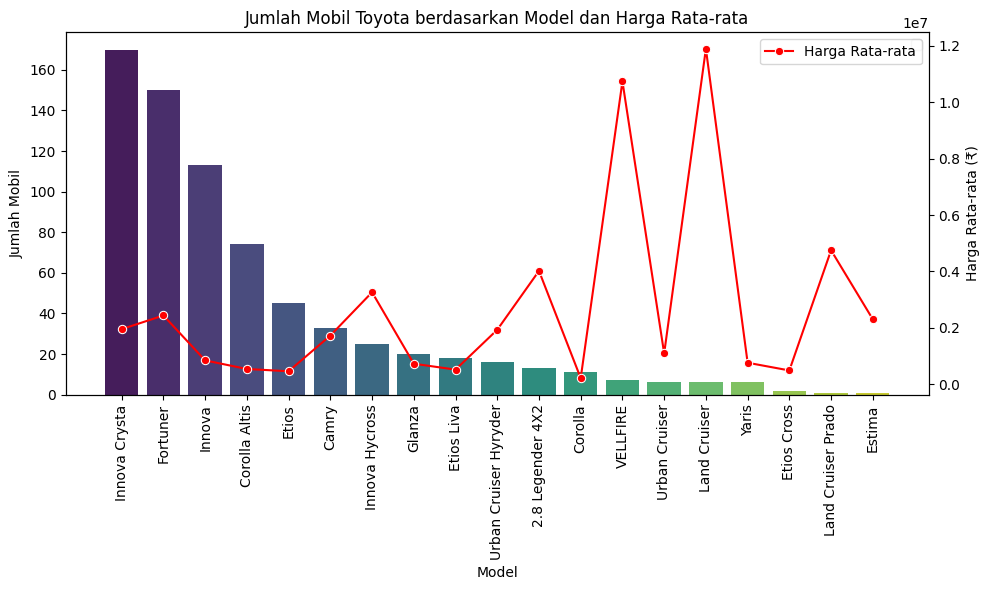

In [ ]:
# membuat plot dengan dua sumbu Y
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot untuk jumlah mobil
sns.barplot(x=brand_model_counts.index, y=brand_model_counts.values, palette='viridis', ax=ax1)
ax1.set_xlabel('Model')
ax1.set_ylabel('Jumlah Mobil')
ax1.set_title(f'Jumlah Mobil {brand_name} berdasarkan Model dan Harga Rata-rata')

# membuat sumbu Y kedua untuk harga rata-rata
ax2 = ax1.twinx()
sns.lineplot(x=brand_model_avg_price.index, y=brand_model_avg_price.values, marker='o', ax=ax2, color='red', label='Harga Rata-rata')

# label untuk sumbu Y kedua
ax2.set_ylabel('Harga Rata-rata (₹)')
ax1.tick_params(axis='x', rotation=90)

# Menambahkan legend
ax1.legend(labelspacing=1.2)
ax2.legend(labelspacing=1.2)

# Menampilkan plot
plt.tight_layout()
plt.show()

2. Merek mobil mana yang memiliki harga rata-rata tertinggi?

<ipython-input-23-52e4518cb9bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AskPrice', y='Brand', data=average_price_per_brand, palette='viridis')


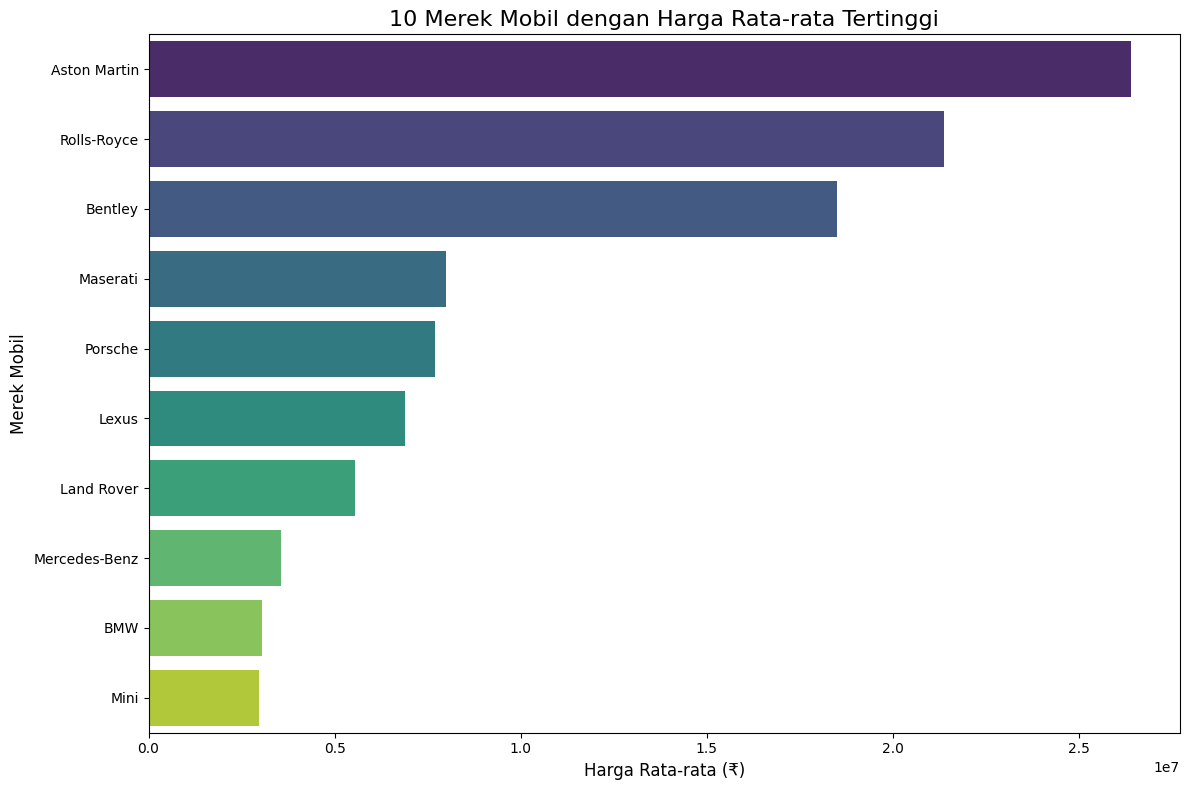

In [ ]:
# visualisasi menggunakan barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='AskPrice', y='Brand', data=average_price_per_brand, palette='viridis')

# menambahkan judul dan label
plt.title('10 Merek Mobil dengan Harga Rata-rata Tertinggi', fontsize=16)
plt.xlabel('Harga Rata-rata (₹)', fontsize=12)
plt.ylabel('Merek Mobil', fontsize=12)

# menampilkan plot
plt.tight_layout()
plt.show()

3. Bagaimana distribusi jenis bahan bakar yang digunakan?

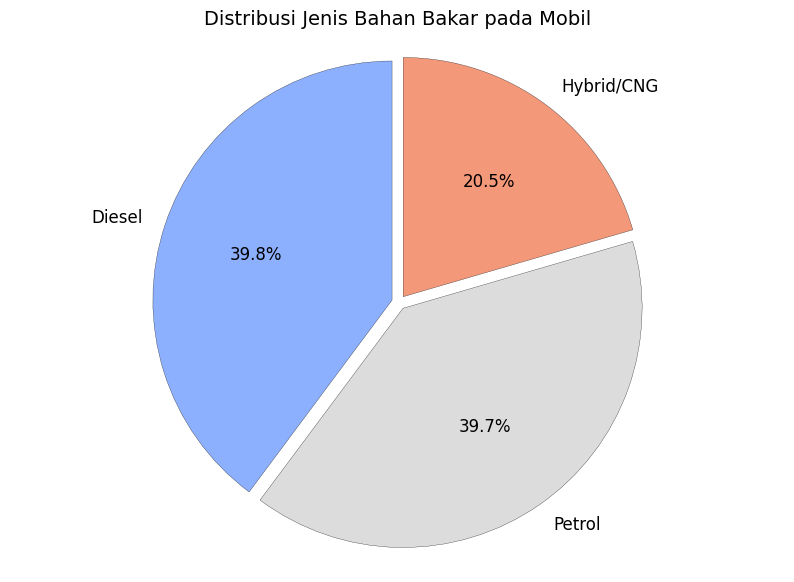

In [ ]:
# membuat pie chart
plt.figure(figsize=(10, 7))
colors = sns.color_palette("coolwarm", len(fuel_counts))

explode = [0.03] * len(fuel_counts)

plt.pie(fuel_counts,
        labels=fuel_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.2, 'linestyle': 'solid', 'edgecolor': 'black'},
        textprops={'fontsize': 12, 'color': 'black'})

# menambahkan judul dan label
plt.title('Distribusi Jenis Bahan Bakar pada Mobil', fontsize=14)

# membuat chart menjadi bulat sempurna
plt.axis('equal')

# menampilkan pie chart
plt.show()

4. Apakah mobil dengan transmisi otomatis lebih mahal dibandingkan transmisi manual?

<ipython-input-25-6f3f9016823b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transmission_avg_price, x='Transmission', y='AskPrice', palette='coolwarm')


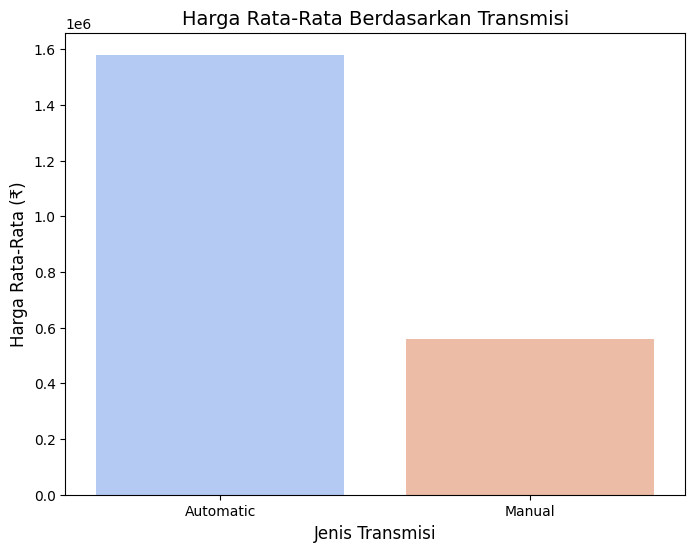

In [ ]:
# membuat barplot untuk perbandingan harga rata-rata
plt.figure(figsize=(8, 6))
sns.barplot(data=transmission_avg_price, x='Transmission', y='AskPrice', palette='coolwarm')

# menambahkan judul dan label
plt.title('Harga Rata-Rata Berdasarkan Transmisi', fontsize=14)
plt.xlabel('Jenis Transmisi', fontsize=12)
plt.ylabel('Harga Rata-Rata (₹)', fontsize=12)

# menampilkan plot
plt.show()

5. Tahun berapa mobil paling banyak dan paling sedikit diproduksi?

<ipython-input-26-0060a8e33323>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_production_by_year.index, y=car_production_by_year.values, palette='viridis')


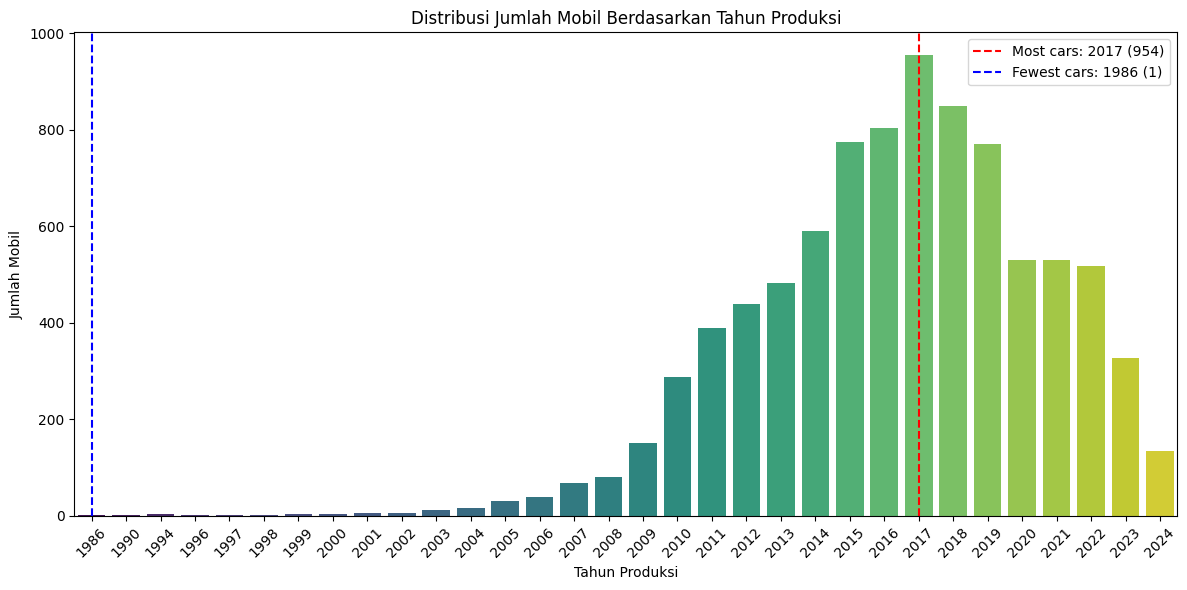

In [ ]:
# melihat tahun dengan mobil terbanyak dan paling sedikit
max_year = car_production_by_year.idxmax()
min_year = car_production_by_year.idxmin()
max_count = car_production_by_year.max()
min_count = car_production_by_year.min()

# membuat plot distribusi jumlah mobil berdasarkan tahun produksi
plt.figure(figsize=(12, 6))
sns.barplot(x=car_production_by_year.index, y=car_production_by_year.values, palette='viridis')

# menambahkan garis vertikal untuk pembeda
plt.axvline(x=car_production_by_year.index.get_loc(max_year), color='red', linestyle='--', label=f'Most cars: {max_year} ({max_count})')
plt.axvline(x=car_production_by_year.index.get_loc(min_year), color='blue', linestyle='--', label=f'Fewest cars: {min_year} ({min_count})')

# menambahkan label dan judul
plt.title('Distribusi Jumlah Mobil Berdasarkan Tahun Produksi')
plt.xlabel('Tahun Produksi')
plt.ylabel('Jumlah Mobil')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

# menampilkan plot
plt.show()

6. Berapa rata-rata usia mobil dan apakah mempengaruhi harganya?

<ipython-input-27-f6033004f798>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=used_car_df['Age'], y=used_car_df['AskPrice'], palette='coolwarm', ax=ax[1])


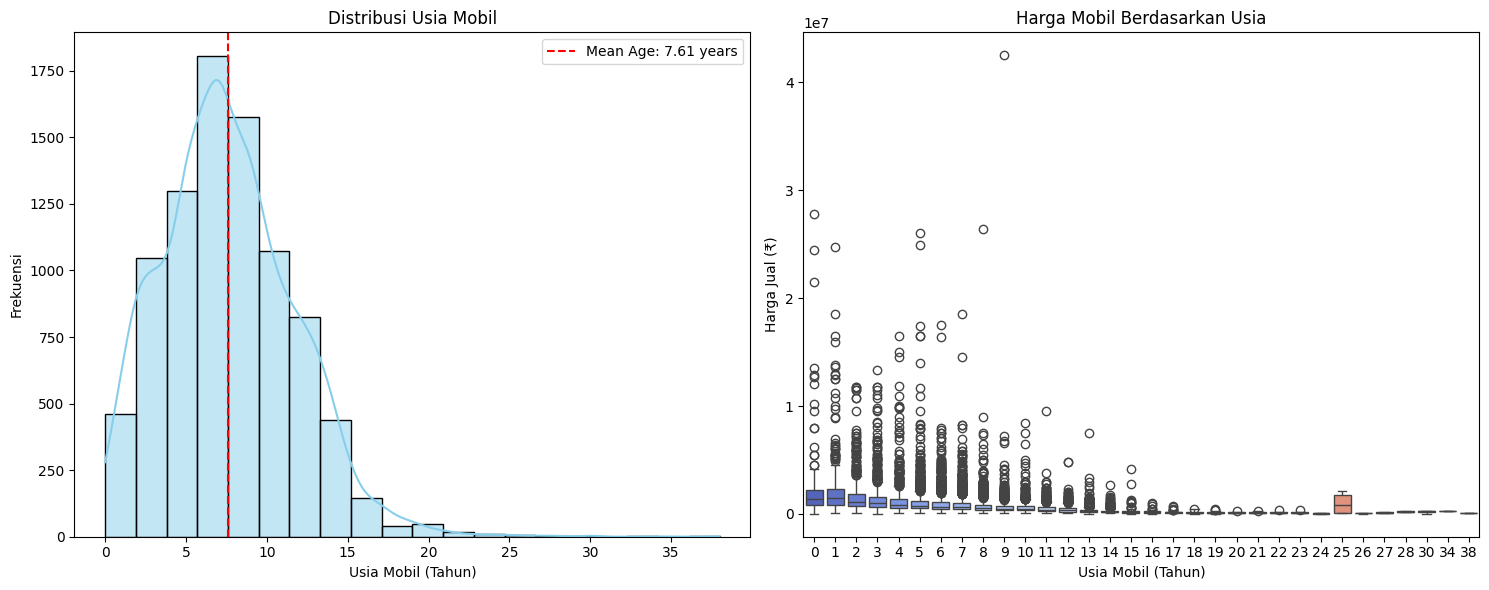

In [ ]:
# membuat plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# histogram untuk distribusi usia mobil
sns.histplot(used_car_df['Age'], bins=20, kde=True, color='skyblue', ax=ax[0])
ax[0].axvline(used_car_df['Age'].mean(), color='red', linestyle='--', label=f'Mean Age: {used_car_df["Age"].mean():.2f} years')

# menambahkan judul dan label untuk distribusi usia mobil
ax[0].set_title('Distribusi Usia Mobil')
ax[0].set_xlabel('Usia Mobil (Tahun)')
ax[0].set_ylabel('Frekuensi')
ax[0].legend()

# plot harga mobil berdasarkan usia mobil
sns.boxplot(x=used_car_df['Age'], y=used_car_df['AskPrice'], palette='coolwarm', ax=ax[1])

# menambahkan judul dan label untuk harga mobil berdasarkan usia
ax[1].set_title('Harga Mobil Berdasarkan Usia')
ax[1].set_xlabel('Usia Mobil (Tahun)')
ax[1].set_ylabel('Harga Jual (₹)')

plt.tight_layout()

# menampilkan plot
plt.show()

## Kesimpulan

- Kesimpulan pertanyaan 1 : Berapa jumlah varian model untuk merek Toyota dan bagaimana hubungannya dengan harga yang ditawarkan?

Dari hasil visualisasi data, jumlah varian model untuk merek Toyota sebanyak 19 model. Hubungan antara jumlah varian model dengan harga yang ditawarkan menunjukkan bahwa model dengan jumlah mobil lebih banyak, seperti Innova Crysta dan Fortuner, cenderung memiliki harga rata-rata yang lebih rendah. Sebaliknya, model dengan jumlah mobil yang lebih sedikit, seperti Land Cruiser, memiliki harga rata-rata yang lebih tinggi.

- Kesimpulan pertanyaan 2 : Merek mobil mana yang memiliki harga rata-rata tertinggi?

Dari hasil visualisasi data, Aston Martin memiliki harga rata-rata tertinggi dibandingkan merek-merek mobil lainnya seperti Rolls-Royce, Bentley, Maserati, Porsche, Lexus, Land Rover, Mercedes-Benz, BMW, dan Mini.

- Kesimpulan pertanyaan 3 : Bagaimana distribusi jenis bahan bakar yang digunakan?

Dari hasil visualisasi data, Diesel adalah jenis bahan bakar yang paling banyak digunakan dengan persentase sebesar 39.8%. Petrol berada di urutan kedua dengan persentase yang hampir sama, yaitu 39.7%. Sementara itu, Hybrid/CNG merupakan jenis bahan bakar yang paling sedikit digunakan dengan persentase sebesar 20.5%. Secara keseluruhan, Diesel dan Petrol mendominasi penggunaan bahan bakar dengan persentase yang hampir seimbang, sementara penggunaan Hybrid/CNG masih relatif rendah.

- Kesimpulan pertanyaan 4 : Apakah mobil dengan transmisi otomatis lebih mahal dibandingkan transmisi manual?

Dari hasil visualisasi data, dapat disimpulkan bahwa mobil dengan transmisi otomatis cenderung memiliki harga yang lebih tinggi dibandingkan dengan mobil dengan transmisi manual. Grafik menunjukkan bahwa rata-rata harga mobil dengan transmisi otomatis mencapai sekitar 1,5 juta INR, sementara rata-rata harga mobil dengan transmisi manual hanya sekitar 0,6 juta INR.

- Kesimpulan pertanyaan 5 : Tahun berapa mobil paling banyak dan paling sedikit diproduksi?

Dari hasil visualisasi data, mobil paling banyak diproduksi pada tahun 2017, dengan jumlah produksi mencapai 954 mobil. Sedangkan, mobil paling sedikit diproduksi pada tahun 1986, dengan hanya 1 mobil yang diproduksi pada tahun tersebut. Hal ini menunjukkan adanya fluktuasi signifikan dalam jumlah produksi mobil selama periode waktu yang ditinjau.

- Kesimpulan pertanyaan 6 : Berapa rata-rata usia mobil dan apakah mempengaruhi harganya?

Dari hasil visualisasi data, rata-rata usia mobil adalah sekitar 7 tahun, dengan puncak distribusi usia mobil berada pada rentang usia 5-10 tahun. Berdasarkan analisis harga, mobil dengan usia 0-10 tahun cenderung memiliki harga yang lebih tinggi, sementara mobil yang lebih tua biasanya memiliki harga yang lebih rendah, yang menunjukkan bahwa usia mobil mempengaruhi harga yang ditawarkan.

In [ ]:
used_car_df.to_csv("used_car.csv", index=False)